Kstate Honor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

# Advanced Data Visualization Emphasizing GeoPandas/GeoSeries

# Data Visualization Overview
Data visualization helps us understand the data and even extract valuable intelligence from the data. "One picture tells more than a thousand words". It is an invaluable techniques for data exploration. 
Data visualization is also considered business intelligence (BI). BI is about visualizing past data (what already happened) in intuitive ways using graphs and charts and helping decision making.
It has become more important than ever before. It is difficult to make sense of “big data” and charts & graphs can be extremely useful for decision making.

# GeoPandas - What is it?
GeoPandas is a project to add support for geographic data to pandas objects. It currently implements GeoSeries and GeoDataFrame types which are subclasses of pandas.Series and pandas.DataFrame, respectively. GeoPandas objects can act on shapely geometry objects and perform geometric operations.

When should you use GeoPandas?
For exploratory data analysis, including in Jupyter notebooks.
For highly compact and readable code. Which in turn improves reproducibility.
If you're comfortable with Pandas, R dataframes, or tabular/relational approaches.

# 1.) Import Client

In [71]:
from dask.distributed import Client
client = Client(processes=False)
client

%matplotlib inline

from __future__ import (absolute_import, division, print_function)
import os

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('bmh')

from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

data_pth = "../data"

In [72]:
mpl.__version__, pd.__version__, gpd.__version__

('2.0.2', u'0.20.1', u'0.2.1')

# Geoseries: Geometry building blocks

Like a Pandas Series, a GeoSeries is the building block for the more broadly useful and powerful GeoDataFrame. A GeoSeries is made up of an index and a GeoPandas geometry data type. This data type is a shapely.geometry object, and therefore inherits their attributes and methods such as area, bounds, distance, etc.

Entries in a GeoSeries can store different geometry types; GeoPandas does not constrain the geometry column to be of the same geometry type. Beware that certain export operations will fail if the list of geometry objects is heterogeneous. GeoPandas has six classes of geometric objects, corresponding to the three basic single-entity geometric types and their associated homogeneous collections of multiple entities:
Single entity- Point, Line, and Polygon
Homogeneous entity collections- Multi-Point, Multi-Line, and Multi-Polygon

# 2.) Creating a geoseries using shapely point objects
Shapely is a Python package for manipulation and analysis of planar geometric objects. Shapely is not concerned with data formats or coordinate systems, but can be readily integrated with packages that are.

In [73]:
from shapely.wkt import loads

GeoSeries([loads('POINT(1 2)'), loads('POINT(1.5 2.5)'), loads('POINT(2 3)')])

0        POINT (1 2)
1    POINT (1.5 2.5)
2        POINT (2 3)
dtype: object

# 3.) Creating a geoseries from shapely using point constructor
Initialize new instance of the point class.

In [74]:
gs = GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
gs

0        POINT (-120 45)
1      POINT (-121.2 46)
2    POINT (-122.9 47.5)
dtype: object

In [75]:
type(gs), len(gs)

(geopandas.geoseries.GeoSeries, 3)

# 4.) A GeoSeries and a GeoDataFrame can store a CRS, or a "Coordinate Reference System", implicitly associated with the geometry column. This is useful as essential spatial metadata and for transformation to another CRS. Let's assign the CRS.

In [76]:
gs.crs = {'init': 'epsg:4326'}

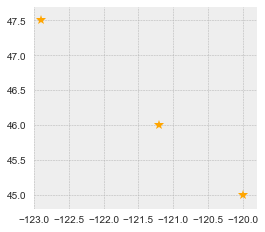

In [85]:
gs.plot(marker='*', color='orange', markersize=10, figsize=(4, 4))
plt.xlim([-123, -119.8])
plt.ylim([44.8, 47.7]);

Define a dictionary of lists, we will use them again later.

In [81]:
data = {'name': ['a', 'b', 'c'],
        'lat': [45, 46, 47.5],
        'lon': [-120, -121.2, -122.9]}

# 5.) Creates a list of point shapely objects of x & y coordinates

In [82]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]
geometry

# 6.) Finishing up GeoSeries - define the values

In [83]:
gs = GeoSeries(geometry, index=data['name'])
gs

a        POINT (-120 45)
b      POINT (-121.2 46)
c    POINT (-122.9 47.5)
dtype: object

# 7.) GeoDataFrames

- Described as a "Feature Collection"

- Each row is a feature, a geometry collection is defined.

- Properties includes the other columns

In [84]:
df = pd.DataFrame(data)
df

,lat,lon,name
0,45.0,-120.0,a
1,46.0,-121.2,b
2,47.5,-122.9,c


# A.) Use of dataframe and "list-of-shapely-Point-objects" approach and Use of two dataframe attribute columns
The fundamental types of geometric objects implemented by Shapely are points, curves, and surfaces. 

In [86]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

# 8.) Plot method from a GeoDataFrame, not from a GeoSeries

Nothing new to visualize, just using different method of visualization.

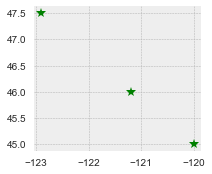

In [88]:
gdf.plot(marker='*', color='green', markersize=10, figsize=(3, 3));

#  9.) Extracting data from gpd. file to analyze geological data

In [109]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,continent,gdp_md_est,geometry,iso_a3,name,pop_est
0,Asia,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",AFG,Afghanistan,28400000.0
1,Africa,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,AGO,Angola,12799293.0
2,Europe,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",ALB,Albania,3639453.0
3,Asia,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",ARE,United Arab Emirates,4798491.0
4,South America,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,ARG,Argentina,40913584.0


In [98]:
world.crs

{'init': u'epsg:4326'}

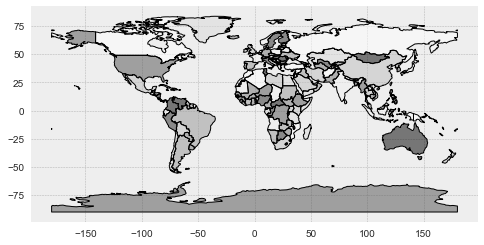

In [99]:
world.plot(figsize=(8, 8));

In [111]:
world.geometry.name
'geometry'

'geometry'

# 10.) Renaming columns to 'Borders'

In [112]:

world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

world.geometry.name
'borders'

'borders'

#  11.) Create the geometry
This helps us to review the data

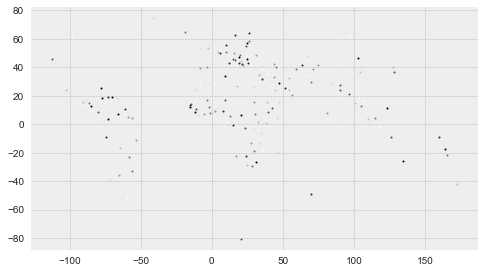

In [113]:
world['centroid_column'] = world.centroid

world = world.set_geometry('centroid_column')

world.plot();

# Geospatial Analysis of Taxi Data

Geospatial analysis, or just spatial analysis, is an approach to applying statistical analysis and other analytic techniques to data which has a geographical or spatial aspect. In this example, data will be segmented by various taxi zone in NYC. We are looking at taxi cab data in New York City from a geospatial angle. This will make it easier to read the data and get a good look of the city and taxi zones.

#  10.) Import Taxi Zone Data with Geopandas

In [70]:
import geopandas as gpd
zones = gpd.read_file('taxi_zones.shp').to_crs({'init' :'epsg:4326'})
zones['zone'] = zones.zone.astype('category')
zones['borough'] = zones.borough.astype('category')
zones.head

<bound method GeoDataFrame.head of      LocationID  OBJECTID  Shape_Area  Shape_Leng        borough  \
0             1         1    0.000782    0.116357            EWR   
1             2         2    0.004866    0.433470         Queens   
2             3         3    0.000314    0.084341          Bronx   
3             4         4    0.000112    0.043567      Manhattan   
4             5         5    0.000498    0.092146  Staten Island   
..          ...       ...         ...         ...            ...   
258         259       259    0.000395    0.126750          Bronx   
259         260       260    0.000422    0.133514         Queens   
260         261       261    0.000034    0.027120      Manhattan   
261         262       262    0.000122    0.049064      Manhattan   
262         263       263    0.000066    0.037017      Manhattan   

                                              geometry  \
0    POLYGON ((-74.18445300000005 40.69499600003324...   
1    (POLYGON ((-73.823375972606

#  12.) Plot with matplotlib
We can see a detailed plot of the city using a simple matplotlib diagram. Matplotlib is a plotting library for Python which may be used interactively or embedded in stand-alone GUIs. Matplotlib tries to make easy things easy and hard things possible. You can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots, etc., with just a few lines of code.

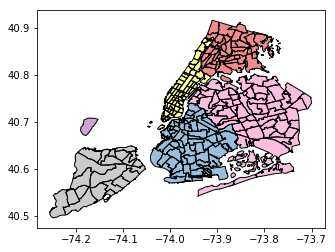

In [68]:
#Data visualization
%matplotlib inline
zones.plot(column='borough', categorical=True)

#  13.) Plot with Bokeh
Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of novel graphics, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.

In [43]:
from bokeh.io import output_notebook
from bokeh.models import GeoJSONDataSource, HoverTool, CategoricalColorMapper, LinearColorMapper
from bokeh.plotting import figure, show
from bokeh.palettes import Category10
output_notebook()

Loading BokehJS ...

In [62]:
geo_source = GeoJSONDataSource(geojson=zones.to_json())

factors = zones.borough.drop_duplicates()
color_mapper = CategoricalColorMapper(factors=factors.tolist(), palette=Category10[10])

fig = figure()
fig.patches(xs='xs', ys='ys', alpha=0.9, source=geo_source, 
          color={'field': 'borough', 'transform': color_mapper},
         )

hover = HoverTool(
    point_policy='follow_mouse',
    tooltips='<p><b>Borough</b>: @borough</p><p><b>Zone</b>: @zone</p>'
)
fig.add_tools(hover)

fig.xaxis.visible = False
fig.yaxis.visible = False
fig.grid.visible = False

show(fig)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Conclusion of Tutorial

Geospatial data analysis is a fun and interactive way in determining geological dimensions. GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. The point of this tutorial is to allow the user to explore data visualization through GeoPandas and GeoSeries by combining concepts we have already learned. 